### Deep Learning based Time Series Clustering Algorithms 

Deep Learning based clustering algorithms for time series are those where `k`
clusters are created from `n` time series. The aim is to cluster so that each 
time series in a cluster are homogenous (similar) to each other and heterogeneous 
(dissimilar) to those outside the cluster. 

Various Deep Learning based Auto-Encoders help in building a low rank representation of the time series, also know as, the latent space or feature extraction. Traditional time series clustering algorithms like KMeans, KNN etc present in aeon are trained on the latent space to get clusters. 

Contents 

- AEAttentionBiGRUClusterer : Auto-Encoder based on Bidirectional Gated Recurrent Units (BiGRUs) with Attention Mechanism.



In [1]:
# Import necessary libraries
from aeon.clustering.deep_learning import AEAttentionBiGRUClusterer
from aeon.datasets import load_unit_test
from aeon.utils.validation._dependencies import _check_soft_dependencies
from aeon.visualisation import plot_cluster_algorithm

if _check_soft_dependencies(["matplotlib"]):
    import matplotlib.pyplot as plt

/home/aadya/.local/lib/python3.10/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
/home/aadya/.local/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
# Load the dataset to be clustered
X_train, y_train = load_unit_test(split="train")
(
    X_test,
    y_test,
) = load_unit_test(split="test")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20, 1, 24) (20,) (22, 1, 24) (22,)


In [3]:
# Define the clusterer with 2 clusters, KMeans algorithm for the latent space
# and train it for 2000 epoch
aeattbgru_clusterer = AEAttentionBiGRUClusterer(
    n_clusters=2, clustering_algorithm="kmeans", n_epochs=2000, verbose=False
)

2024-07-21 22:52:14.834148: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-21 22:52:18.422207: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 22:52:18.422467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 22:52:18.893543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 22:52:20.411974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [4]:
# Fit the clusterer
aeattbgru_clusterer.fit(X_train)

2024-07-21 22:52:47.901524: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1/1 [==============================] - 3s 3s/step


AEAttentionBiGRUClusterer(n_clusters=2)

In [5]:
# Calculate Score
aeattbgru_clusterer.score(X_train)

1/1 [==============================] - 0s 73ms/step


-167383.65431427956

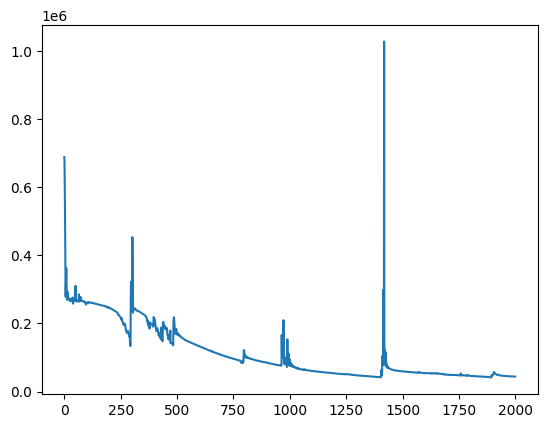

In [6]:
# Plot history for epochs

history = aeattbgru_clusterer.summary()

if _check_soft_dependencies(["matplotlib"]):
    plt.plot(history["loss"])

1/1 [==============================] - 0s 88ms/step


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

<Figure size 500x1000 with 0 Axes>

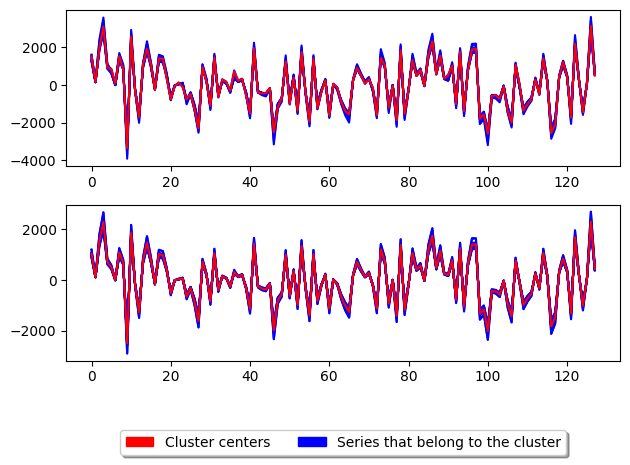

In [7]:
# Visualize the Algorithm
_X_test = X_test.transpose(0, 2, 1)
_latent_space = aeattbgru_clusterer.model_.layers[1].predict(_X_test)
plot_cluster_algorithm(
    aeattbgru_clusterer.clusterer, _latent_space, aeattbgru_clusterer.n_clusters
)